# VGG16+mlp高准确率识别猫狗

In [1]:
#加载第一张图片
from keras.preprocessing.image import load_img, img_to_array
pic1 = '1.png'
pic1 = load_img(pic1,target_size=(224,224))
print(pic1)

Using TensorFlow backend.


<PIL.Image.Image image mode=RGB size=224x224 at 0x214FFA064A8>


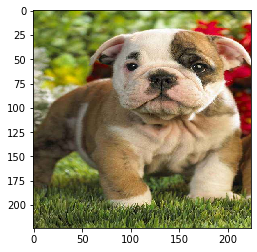

In [2]:
#可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.imshow(pic1)

In [3]:
#图片格式转数组格式
pic1 = img_to_array(pic1)
print(type(pic1))
print(pic1.shape)

<class 'numpy.ndarray'>
(224, 224, 3)


In [4]:
#数据预处理
from keras.applications.vgg16 import preprocess_input
import numpy as np
x = np.expand_dims(pic1,axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [5]:
#图像核心特征提取
from keras.applications.vgg16 import VGG16
model_vgg = VGG16(weights='imagenet',include_top=False)
features = model_vgg.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [6]:
print(features)

[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 2.8832979e+01]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 5.2411633e+01]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 9.4602652e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 5.1430378e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   ...
   [1.8990492e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [9.1413719e

In [7]:
#flatten展开
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


In [8]:
#load image and preprocess it with vgg16 structure
#--by flare
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
#define a method to load and preprocess the image
def modelProcess(img_path,model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
#list file names of the training datasets
import os
folder = "task2_data/cats"
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]

#preprocess multiple images
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features1[i] = feature_i
    
folder = "task2_data/dogs"
dirs = os.listdir(folder)
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features2[i] = feature_i
    
#label the results
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)

preprocessed: task2_data/cats//cats_1.jpg
preprocessed: task2_data/cats//cats_10.jpg
preprocessed: task2_data/cats//cats_100.jpg
preprocessed: task2_data/cats//cats_101.jpg
preprocessed: task2_data/cats//cats_102.jpg
preprocessed: task2_data/cats//cats_103.jpg
preprocessed: task2_data/cats//cats_104.jpg
preprocessed: task2_data/cats//cats_105.jpg
preprocessed: task2_data/cats//cats_106.jpg
preprocessed: task2_data/cats//cats_107.jpg
preprocessed: task2_data/cats//cats_108.jpg
preprocessed: task2_data/cats//cats_109.jpg
preprocessed: task2_data/cats//cats_11.jpg
preprocessed: task2_data/cats//cats_110.jpg
preprocessed: task2_data/cats//cats_111.jpg
preprocessed: task2_data/cats//cats_112.jpg
preprocessed: task2_data/cats//cats_113.jpg
preprocessed: task2_data/cats//cats_114.jpg
preprocessed: task2_data/cats//cats_115.jpg
preprocessed: task2_data/cats//cats_116.jpg
preprocessed: task2_data/cats//cats_117.jpg
preprocessed: task2_data/cats//cats_118.jpg
preprocessed: task2_data/cats//cats_

preprocessed: task2_data/cats//cats_268.jpg
preprocessed: task2_data/cats//cats_269.jpg
preprocessed: task2_data/cats//cats_27.jpg
preprocessed: task2_data/cats//cats_270.jpg
preprocessed: task2_data/cats//cats_271.jpg
preprocessed: task2_data/cats//cats_272.jpg
preprocessed: task2_data/cats//cats_273.jpg
preprocessed: task2_data/cats//cats_274.jpg
preprocessed: task2_data/cats//cats_275.jpg
preprocessed: task2_data/cats//cats_276.jpg
preprocessed: task2_data/cats//cats_277.jpg
preprocessed: task2_data/cats//cats_278.jpg
preprocessed: task2_data/cats//cats_279.jpg
preprocessed: task2_data/cats//cats_28.jpg
preprocessed: task2_data/cats//cats_280.jpg
preprocessed: task2_data/cats//cats_281.jpg
preprocessed: task2_data/cats//cats_282.jpg
preprocessed: task2_data/cats//cats_283.jpg
preprocessed: task2_data/cats//cats_284.jpg
preprocessed: task2_data/cats//cats_285.jpg
preprocessed: task2_data/cats//cats_286.jpg
preprocessed: task2_data/cats//cats_287.jpg
preprocessed: task2_data/cats//cat

preprocessed: task2_data/dogs//dogs_168.jpg
preprocessed: task2_data/dogs//dogs_169.jpg
preprocessed: task2_data/dogs//dogs_17.jpg
preprocessed: task2_data/dogs//dogs_170.jpg
preprocessed: task2_data/dogs//dogs_171.jpg
preprocessed: task2_data/dogs//dogs_172.jpg
preprocessed: task2_data/dogs//dogs_173.jpg
preprocessed: task2_data/dogs//dogs_174.jpg
preprocessed: task2_data/dogs//dogs_175.jpg
preprocessed: task2_data/dogs//dogs_176.jpg
preprocessed: task2_data/dogs//dogs_177.jpg
preprocessed: task2_data/dogs//dogs_178.jpg
preprocessed: task2_data/dogs//dogs_179.jpg
preprocessed: task2_data/dogs//dogs_18.jpg
preprocessed: task2_data/dogs//dogs_180.jpg
preprocessed: task2_data/dogs//dogs_181.jpg
preprocessed: task2_data/dogs//dogs_182.jpg
preprocessed: task2_data/dogs//dogs_183.jpg
preprocessed: task2_data/dogs//dogs_184.jpg
preprocessed: task2_data/dogs//dogs_185.jpg
preprocessed: task2_data/dogs//dogs_186.jpg
preprocessed: task2_data/dogs//dogs_187.jpg
preprocessed: task2_data/dogs//dog

preprocessed: task2_data/dogs//dogs_67.jpg
preprocessed: task2_data/dogs//dogs_68.jpg
preprocessed: task2_data/dogs//dogs_69.jpg
preprocessed: task2_data/dogs//dogs_7.jpg
preprocessed: task2_data/dogs//dogs_70.jpg
preprocessed: task2_data/dogs//dogs_71.jpg
preprocessed: task2_data/dogs//dogs_72.jpg
preprocessed: task2_data/dogs//dogs_73.jpg
preprocessed: task2_data/dogs//dogs_74.jpg
preprocessed: task2_data/dogs//dogs_75.jpg
preprocessed: task2_data/dogs//dogs_76.jpg
preprocessed: task2_data/dogs//dogs_77.jpg
preprocessed: task2_data/dogs//dogs_78.jpg
preprocessed: task2_data/dogs//dogs_79.jpg
preprocessed: task2_data/dogs//dogs_8.jpg
preprocessed: task2_data/dogs//dogs_80.jpg
preprocessed: task2_data/dogs//dogs_81.jpg
preprocessed: task2_data/dogs//dogs_82.jpg
preprocessed: task2_data/dogs//dogs_83.jpg
preprocessed: task2_data/dogs//dogs_84.jpg
preprocessed: task2_data/dogs//dogs_85.jpg
preprocessed: task2_data/dogs//dogs_86.jpg
preprocessed: task2_data/dogs//dogs_87.jpg
preprocessed:

In [10]:
print(X.shape)

(600, 25088)


In [11]:
#数据分离
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,X.shape)

(480, 25088) (120, 25088) (600, 25088)


In [12]:
#建立mlp模型
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
#隐藏层
model.add(Dense(units=10,activation='relu',input_dim=25088))
#输出层
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                250890    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [13]:
#模型求解参数配置
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#模型训练
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
480/480 [==============================] - 0s 733us/step - loss: 2.5909 - accuracy: 0.7563
Epoch 2/50
480/480 [==============================] - 0s 443us/step - loss: 0.2200 - accuracy: 0.9563
Epoch 3/50
480/480 [==============================] - 0s 464us/step - loss: 0.1143 - accuracy: 0.9812
Epoch 4/50
480/480 [==============================] - 0s 462us/step - loss: 0.0877 - accuracy: 0.9854
Epoch 5/50
480/480 [==============================] - 0s 454us/step - loss: 0.0672 - accuracy: 0.9833
Epoch 6/50
480/480 [==============================] - 0s 473us/step - loss: 0.0396 - accuracy: 0.9875
Epoch 7/50
480/480 [==============================] - 0s 487us/step - loss: 0.0321 - accuracy: 0.9875
Epoch 8/50
480/480 [==============================] - 0s 516us/step - loss: 0.0183 - accuracy: 0.9958
Epoch 9/50
480/480 [==============================] - 0s 504us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 10/50
480/480 [==============================] - 0s 512us/step - loss: 0.015

In [15]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict_classes(X_train)
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

1.0


In [16]:
#测试数据预测准确率
y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.975


In [17]:
#图片加载》图片格式转化》数据预处理》vgg16特征信息提取》模型预测
pic1 = '1.png'
pic1 = load_img(pic1,target_size=(224,224))
pic1_array = img_to_array(pic1)
pic1_array = np.expand_dims(pic1_array,axis=0)
pic1_array = preprocess_input(pic1_array)
pic1_features = model_vgg.predict(pic1_array)
pic1_features= pic1_features.reshape(1,7*7*512)
#mlp模型预测
result = model.predict_classes(pic1_features)
#1:dog； 0：cat
print('dog' if result==1 else 'cat')

dog


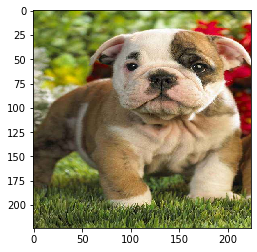

In [18]:
fig3 = plt.figure()
plt.imshow(pic1)

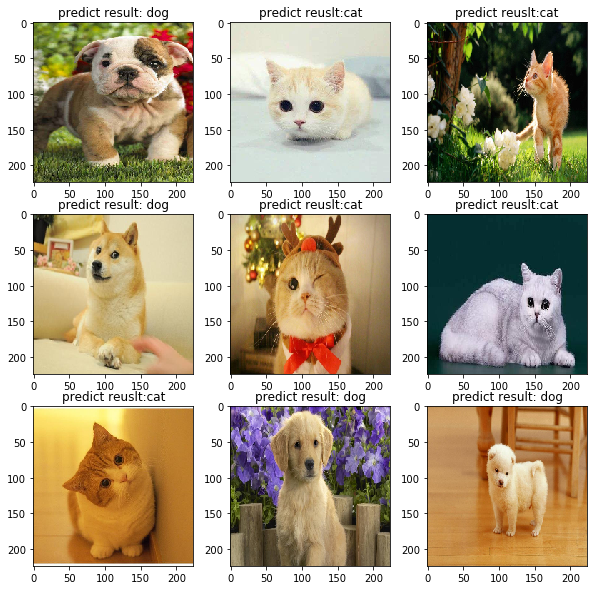

In [19]:
#本地九张图片处理
a = [i for i in range(1,10)]
fig3 = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.png'
    
    
    pic1 = img_name
    pic1 = load_img(pic1,target_size=(224,224))
    pic1_array = img_to_array(pic1)
    pic1_array = np.expand_dims(pic1_array,axis=0)
    pic1_array = preprocess_input(pic1_array)
    pic1_features = model_vgg.predict(pic1_array)
    pic1_features= pic1_features.reshape(1,7*7*512)
    #mlp模型预测
    result = model.predict_classes(pic1_features)
    #1:dog； 0：cat
#     print('dog' if result==1 else 'cat')
    
    plt.subplot(3,3,i)
    plt.imshow(pic1)
    plt.title('predict result: dog' if result==1 else 'predict reuslt:cat')

In [ ]:
#model保存
model.save('task2_model_1.h5')

In [ ]:
font2 = 

![materials](materials2.png)